# 目的変数をstateとする分類問題

## DAY1

ロジスティック回帰を実際に実装してみる

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier

## データの読み込み

In [3]:
df = pd.read_csv("./ks-projects-201801.csv")
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [3]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [9]:
df.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

- 目的変数に`state`をセット
- とりあえずintのみで計算してみる（欠損の多い`usd pledged`は使わない）

In [4]:
y = df["state"].values
X_01 = df[["goal", "pledged", "backers", "usd_pledged_real", "usd_goal_real"]].values

In [35]:
np.unique(y)

array(['canceled', 'failed', 'live', 'successful', 'suspended',
       'undefined'], dtype=object)

## ロジスティック回帰を行う

In [5]:
clf = SGDClassifier(
    loss = "log",
    penalty = "none",
    max_iter = 10000,
    fit_intercept=True,
    random_state=1234,
    tol=1e-3
)

clf.fit(X_01, y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log',
              max_iter=10000, n_iter_no_change=5, n_jobs=None, penalty='none',
              power_t=0.5, random_state=1234, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

## 予測精度を得る

混合行列の作成

In [6]:
from  sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

y_pred = clf.predict(X_01)

正答率

In [10]:
accuracy =  accuracy_score(y, y_pred)
print('正答率（Accuracy） = {:.3f}%'.format(100 * accuracy))

正答率（Accuracy） = 62.042%


Precision, Recall, F1-score

In [11]:
precision, recall, f1_score, _ = precision_recall_fscore_support(y, y_pred)

print('適合率（Precision） = {:.3f}%'.format(100 * precision[1]))
print('再現率（Recall） = {:.3f}%'.format(100 * recall[1]))
print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[1]))

適合率（Precision） = 79.734%
再現率（Recall） = 42.707%
F1値（F1-score） = 55.622%


/Users/kenjoushunsuke/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


混合行列

In [40]:
conf_mat = confusion_matrix(y, y_pred, labels = ['canceled', 'failed', 'live', 'successful', 'suspended','undefined'])
conf_mat = pd.DataFrame(conf_mat,
                        index=['正解 = canceled', '正解 = failed', '正解 = live', '正解 = successful', '正解 = suspended', '正解 = undefined'], 
                        columns=['予測 = canceled', '予測 = failed', '予測 = live', '予測 = successful', '予測 = suspended', '予測 = undefined'])
conf_mat

,予測 = canceled,予測 = failed,予測 = live,予測 = successful,予測 = suspended,予測 = undefined
正解 = canceled,16594,18535,0,3650,0,0
正解 = failed,96970,84440,0,16309,0,0
正解 = live,1102,962,0,735,0,0
正解 = successful,0,0,61,133895,0,0
正解 = suspended,526,870,0,450,0,0
正解 = undefined,747,1095,0,1720,0,0


In [7]:
# 性能評価のmethod
def evaluation(y, y_pred):
    accuracy =  accuracy_score(y, y_pred)
    print('正答率（Accuracy） = {:.3f}%'.format(100 * accuracy))
    
    precision, recall, f1_score, _ = precision_recall_fscore_support(y, y_pred)
    print('適合率（Precision） = {:.3f}%'.format(100 * precision[1]))
    print('再現率（Recall） = {:.3f}%'.format(100 * recall[1]))
    print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[1]))
    
    conf_mat = confusion_matrix(y, y_pred, labels = ['canceled', 'failed', 'live', 'successful', 'suspended','undefined'])
    conf_mat = pd.DataFrame(conf_mat,
                        index=['正解 = canceled', '正解 = failed', '正解 = live', '正解 = successful', '正解 = suspended', '正解 = undefined'], 
                        columns=['予測 = canceled', '予測 = failed', '予測 = live', '予測 = successful', '予測 = suspended', '予測 = undefined'])
    display(conf_mat)

In [47]:
evaluation(y, y_pred)

正答率（Accuracy） = 62.042%
適合率（Precision） = 79.734%
再現率（Recall） = 42.707%
F1値（F1-score） = 55.622%


,予測 = canceled,予測 = failed,予測 = live,予測 = successful,予測 = suspended,予測 = undefined
正解 = canceled,16594,18535,0,3650,0,0
正解 = failed,96970,84440,0,16309,0,0
正解 = live,1102,962,0,735,0,0
正解 = successful,0,0,61,133895,0,0
正解 = suspended,526,870,0,450,0,0
正解 = undefined,747,1095,0,1720,0,0


## DAY2

学習した内容を下に処理を行ってみて、DAY１の結果と比べる

### ホールドアウト法

In [13]:
from sklearn.model_selection import train_test_split

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_01, y, test_size=test_size, random_state=1234) 

学習用データを用いて学習

In [15]:
clf.fit(X_train, y_train)

# 訓練データで予測
y_pred_train = clf.predict(X_train)

訓練誤差の評価

In [48]:
evaluation(y_train, y_pred_train)

正答率（Accuracy） = 79.895%


/Users/kenjoushunsuke/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


適合率（Precision） = 81.485%
再現率（Recall） = 87.412%
F1値（F1-score） = 84.345%


,予測 = canceled,予測 = failed,予測 = live,予測 = successful,予測 = suspended,予測 = undefined
正解 = canceled,0,27317,37,3690,0,3
正解 = failed,0,138120,0,19880,0,10
正解 = live,0,1531,35,686,0,0
正解 = successful,0,0,3429,103870,7,0
正解 = suspended,0,1076,29,355,0,0
正解 = undefined,0,1459,0,1391,3,0


汎化誤差の評価

In [49]:
# テストデータで予測
y_pred_test = clf.predict(X_test)

evaluation(y_test, y_pred_test)

正答率（Accuracy） = 61.974%
適合率（Precision） = 79.892%
再現率（Recall） = 42.844%
F1値（F1-score） = 55.777%


/Users/kenjoushunsuke/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,予測 = canceled,予測 = failed,予測 = live,予測 = successful,予測 = suspended,予測 = undefined
正解 = canceled,3284,3703,0,745,0,0
正解 = failed,19447,17013,0,3249,0,0
正解 = live,214,185,0,148,0,0
正解 = successful,0,0,12,26638,0,0
正解 = suspended,105,178,0,103,0,0
正解 = undefined,161,216,0,332,0,0


汎化誤差がかなり悪い...??

### 交差検証法

In [53]:
from sklearn.model_selection import KFold

n_split = 5 # グループ数を設定（今回は5分割）

# kfold: K-分割交差検証
for train_idx, test_idx in KFold(n_splits=n_split, shuffle=True, random_state=1234).split(X_01, y):
    X_train, y_train = X_01[train_idx], y[train_idx]
    X_test, y_test = X_01[test_idx], y[test_idx]
    
    clf.fit(X_train, y_train)

    # テストデータに対する予測を実行
    y_pred_test = clf.predict(X_test)
    
    # 性能評価
    evaluation(y_test, y_pred_test)

/Users/kenjoushunsuke/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


正答率（Accuracy） = 87.465%
適合率（Precision） = 82.017%
再現率（Recall） = 99.763%
F1値（F1-score） = 90.024%


/Users/kenjoushunsuke/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,予測 = canceled,予測 = failed,予測 = live,予測 = successful,予測 = suspended,予測 = undefined
正解 = canceled,0,7549,0,183,0,0
正解 = failed,0,39615,0,94,0,0
正解 = live,0,441,1,105,0,0
正解 = successful,0,0,26,26624,0,0
正解 = suspended,0,309,1,76,0,0
正解 = undefined,0,387,0,322,0,0


正答率（Accuracy） = 61.205%
適合率（Precision） = 57.419%
再現率（Recall） = 100.000%
F1値（F1-score） = 72.950%


/Users/kenjoushunsuke/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,予測 = canceled,予測 = failed,予測 = live,予測 = successful,予測 = suspended,予測 = undefined
正解 = canceled,0,7752,0,57,0,0
正解 = failed,0,39399,0,0,0,0
正解 = live,0,495,0,50,0,0
正解 = successful,0,19992,0,6953,0,0
正解 = suspended,0,313,0,43,0,0
正解 = undefined,0,666,0,12,0,0


正答率（Accuracy） = 66.763%
適合率（Precision） = 80.852%
再現率（Recall） = 58.127%
F1値（F1-score） = 67.632%


/Users/kenjoushunsuke/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,予測 = canceled,予測 = failed,予測 = live,予測 = successful,予測 = suspended,予測 = undefined
正解 = canceled,691,4749,0,304,0,1972
正解 = failed,2965,23012,0,809,0,12803
正解 = live,57,258,0,119,0,132
正解 = successful,0,0,0,26782,0,0
正解 = suspended,32,189,0,60,0,69
正解 = undefined,55,254,0,344,0,76


/Users/kenjoushunsuke/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


正答率（Accuracy） = 87.361%
適合率（Precision） = 81.701%
再現率（Recall） = 99.792%
F1値（F1-score） = 89.845%


/Users/kenjoushunsuke/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,予測 = canceled,予測 = failed,予測 = live,予測 = successful,予測 = suspended,予測 = undefined
正解 = canceled,0,7551,18,132,0,2
正解 = failed,0,39392,72,10,0,0
正解 = live,0,481,0,79,0,0
正解 = successful,0,97,3,26768,0,35
正解 = suspended,0,304,4,60,0,0
正解 = undefined,0,390,0,334,0,0


正答率（Accuracy） = 71.712%
適合率（Precision） = 81.125%
再現率（Recall） = 67.306%
F1値（F1-score） = 73.572%


/Users/kenjoushunsuke/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,予測 = canceled,予測 = failed,予測 = live,予測 = successful,予測 = suspended,予測 = undefined
正解 = canceled,1084,5409,1172,154,0,0
正解 = failed,6468,26618,6452,10,0,0
正解 = live,91,287,113,90,0,0
正解 = successful,181,0,1,26494,0,0
正解 = suspended,36,219,70,61,0,0
正解 = undefined,42,278,64,338,0,0


- 計算負荷がかなり高い...(時間がかかる...)
- 結果が分割方法によってかなりばらつくのが面白い

## 正則化


`SGDClassifier`の正則化は`penalty`のパラメーターで行う
- L1正則化: `l1`
- L2正則化: `l2` (default)
- ElasticNet: `elasticnet`

alpha (float, default=0.0001) : 正則化にかけられる係数

l1_ratio (float, default=0.15) : L1正則化とL2正則化の比率を決定

### Ridge

係数の値が小さくなるように正則化

In [59]:
alphas = [1e-6, 1e-4, 1e-1]

for alpha in alphas:

    clf = SGDClassifier(
        loss = "log",
        penalty = "l1",
        alpha = alpha,
        max_iter = 10000,
        fit_intercept=True,
        random_state=1234,
        tol=1e-3
    )
    
    clf.fit(X_01, y)
    y_pred = clf.predict(X_01)
    evaluation(y, y_pred)

正答率（Accuracy） = 60.200%


/Users/kenjoushunsuke/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


適合率（Precision） = 80.331%
再現率（Recall） = 46.924%
F1値（F1-score） = 59.243%


,予測 = canceled,予測 = failed,予測 = live,予測 = successful,予測 = suspended,予測 = undefined
正解 = canceled,0,19715,18041,833,190,0
正解 = failed,0,92778,103415,612,914,0
正解 = live,0,1038,1219,457,85,0
正解 = successful,4,0,1,133951,0,0
正解 = suspended,0,844,687,310,5,0
正解 = undefined,0,1120,788,1654,0,0


正答率（Accuracy） = 66.584%


/Users/kenjoushunsuke/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


適合率（Precision） = 81.000%
再現率（Recall） = 58.095%
F1値（F1-score） = 67.661%


,予測 = canceled,予測 = failed,予測 = live,予測 = successful,予測 = suspended,予測 = undefined
正解 = canceled,13379,23510,316,1574,0,0
正解 = failed,76785,114864,1256,4814,0,0
正解 = live,1017,1157,76,549,0,0
正解 = successful,10146,0,1,123809,0,0
正解 = suspended,468,985,19,374,0,0
正解 = undefined,805,1291,12,1454,0,0


/Users/kenjoushunsuke/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


正答率（Accuracy） = 54.493%


/Users/kenjoushunsuke/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


適合率（Precision） = 79.695%
再現率（Recall） = 39.388%
F1値（F1-score） = 52.720%


,予測 = canceled,予測 = failed,予測 = live,予測 = successful,予測 = suspended,予測 = undefined
正解 = canceled,0,17181,20950,648,0,0
正解 = failed,0,77877,119839,3,0,0
正解 = live,0,864,1509,426,0,0
正解 = successful,0,0,6999,126957,0,0
正解 = suspended,0,790,776,280,0,0
正解 = undefined,0,1007,1044,1511,0,0


### Lasso

値を0とする係数が多くなるように正則化

In [60]:
alphas = [1e-6, 1e-4, 1e-1]

for alpha in alphas:

    clf = SGDClassifier(
        loss = "log",
        penalty = "l2",
        alpha = alpha,
        max_iter = 10000,
        fit_intercept=True,
        random_state=1234,
        tol=1e-3
    )
    
    clf.fit(X_01, y)
    y_pred = clf.predict(X_01)
    evaluation(y, y_pred)

正答率（Accuracy） = 60.723%


/Users/kenjoushunsuke/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


適合率（Precision） = 79.799%
再現率（Recall） = 45.904%
F1値（F1-score） = 58.281%


,予測 = canceled,予測 = failed,予測 = live,予測 = successful,予測 = suspended,予測 = undefined
正解 = canceled,5272,19812,0,13691,0,4
正解 = failed,28322,90760,0,78637,0,0
正解 = live,266,1079,0,1451,0,3
正解 = successful,0,0,0,133904,0,52
正解 = suspended,137,927,0,782,0,0
正解 = undefined,266,1158,0,2138,0,0


正答率（Accuracy） = 48.577%


/Users/kenjoushunsuke/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


適合率（Precision） = 75.675%
再現率（Recall） = 28.220%
F1値（F1-score） = 41.110%


,予測 = canceled,予測 = failed,予測 = live,予測 = successful,予測 = suspended,予測 = undefined
正解 = canceled,0,9218,1,880,28680,0
正解 = failed,0,55797,1,1108,140813,0
正解 = live,0,859,0,456,1484,0
正解 = successful,0,6953,0,127003,0,0
正解 = suspended,0,405,0,297,1144,0
正解 = undefined,0,500,0,1463,1599,0


正答率（Accuracy） = 76.464%


/Users/kenjoushunsuke/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


適合率（Precision） = 78.582%
再現率（Recall） = 83.008%
F1値（F1-score） = 80.734%


,予測 = canceled,予測 = failed,予測 = live,予測 = successful,予測 = suspended,予測 = undefined
正解 = canceled,0,31679,0,7094,0,6
正解 = failed,0,164123,0,33596,0,0
正解 = live,0,1579,0,1215,0,5
正解 = successful,0,8373,3,125415,0,165
正解 = suspended,0,1242,0,603,0,1
正解 = undefined,0,1860,0,1702,0,0


### ElasticNet

RidgeとLassoを組み合わせたものであり、両者のバランスによって性質が決まる。

In [61]:
l1_ratios = [0.15, 0.5, 0.85]

for l1_ratio in l1_ratios:

    clf = SGDClassifier(
        loss = "log",
        penalty = "elasticnet",
        l1_ratio = l1_ratio,
        max_iter = 10000,
        fit_intercept=True,
        random_state=1234,
        tol=1e-3
    )
    
    clf.fit(X_01, y)
    y_pred = clf.predict(X_01)
    evaluation(y, y_pred)

正答率（Accuracy） = 74.992%


/Users/kenjoushunsuke/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


適合率（Precision） = 81.158%
再現率（Recall） = 75.851%
F1値（F1-score） = 78.415%


,予測 = canceled,予測 = failed,予測 = live,予測 = successful,予測 = suspended,予測 = undefined
正解 = canceled,0,30297,260,8222,0,0
正解 = failed,0,149972,1018,46729,0,0
正解 = live,0,1634,74,1091,0,0
正解 = successful,38,0,0,133918,0,0
正解 = suspended,1,1226,15,604,0,0
正解 = undefined,0,1661,11,1890,0,0


正答率（Accuracy） = 79.741%


/Users/kenjoushunsuke/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


適合率（Precision） = 81.404%
再現率（Recall） = 84.030%
F1値（F1-score） = 82.696%


,予測 = canceled,予測 = failed,予測 = live,予測 = successful,予測 = suspended,予測 = undefined
正解 = canceled,1544,33048,3371,816,0,0
正解 = failed,8870,166143,22478,228,0,0
正解 = live,221,1799,306,473,0,0
正解 = successful,1,0,0,133955,0,0
正解 = suspended,101,1312,119,314,0,0
正解 = undefined,14,1794,100,1654,0,0


正答率（Accuracy） = 61.644%


/Users/kenjoushunsuke/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


適合率（Precision） = 80.051%
再現率（Recall） = 50.076%
F1値（F1-score） = 61.611%


,予測 = canceled,予測 = failed,予測 = live,予測 = successful,予測 = suspended,予測 = undefined
正解 = canceled,0,21313,14418,3033,15,0
正解 = failed,0,99010,85102,13549,58,0
正解 = live,0,1164,852,754,29,0
正解 = successful,0,0,0,133553,403,0
正解 = suspended,0,966,426,447,7,0
正解 = undefined,0,1231,652,1679,0,0


- どの指標で評価すればいいかが難しい...(トレードオフのようになっている)
- `ElasticNet`の`l1_ratio`が0.15か0.5がかなりうまく学習できている（l1とl2をうまく組み合わせるのが最適??l2が大きいとうまくいっていない...??）

## 前処理（正規化・標準化・無相関化・白色化）

正規化・標準化を行い、上で結果の良かった学習の設定を使ってみる

In [66]:
np.set_printoptions(threshold=99)
print(X_01)

[[1.00000e+03 0.00000e+00 0.00000e+00 0.00000e+00 1.53395e+03]
 [3.00000e+04 2.42100e+03 1.50000e+01 2.42100e+03 3.00000e+04]
 [4.50000e+04 2.20000e+02 3.00000e+00 2.20000e+02 4.50000e+04]
 ...
 [1.50000e+04 2.00000e+01 1.00000e+00 2.00000e+01 1.50000e+04]
 [1.50000e+04 2.00000e+02 6.00000e+00 2.00000e+02 1.50000e+04]
 [2.00000e+03 5.24000e+02 1.70000e+01 5.24000e+02 2.00000e+03]]


### 正規化

In [69]:
from sklearn.preprocessing import MinMaxScaler

normsc = MinMaxScaler()
X_02 = normsc.fit_transform(X_01)

clf = SGDClassifier(
    loss = "log",
    penalty = "elasticnet",
    l1_ratio = 0.5,
    max_iter = 10000,
    fit_intercept=True,
    random_state=1234,
    tol=1e-3
)

clf.fit(X_02, y)
y_pred = clf.predict(X_02)
evaluation(y, y_pred)

正答率（Accuracy） = 52.300%


/Users/kenjoushunsuke/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


適合率（Precision） = 52.260%
再現率（Recall） = 100.000%
F1値（F1-score） = 68.645%


,予測 = canceled,予測 = failed,予測 = live,予測 = successful,予測 = suspended,予測 = undefined
正解 = canceled,0,38778,0,1,0,0
正解 = failed,0,197719,0,0,0,0
正解 = live,0,2799,0,0,0,0
正解 = successful,0,133637,0,319,0,0
正解 = suspended,0,1845,0,1,0,0
正解 = undefined,0,3562,0,0,0,0


### 標準化

In [22]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_03 = stdsc.fit_transform(X_01)

clf = SGDClassifier(
    loss = "log",
    penalty = "elasticnet",
    l1_ratio = 0.5,
    max_iter = 10000,
    fit_intercept=True,
    random_state=1234,
    tol=1e-3
)

clf.fit(X_03, y)
y_pred = clf.predict(X_03)
evaluation(y, y_pred)

正答率（Accuracy） = 71.028%


/Users/kenjoushunsuke/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


適合率（Precision） = 65.945%
再現率（Recall） = 95.621%
F1値（F1-score） = 78.057%


,予測 = canceled,予測 = failed,予測 = live,予測 = successful,予測 = suspended,予測 = undefined
正解 = canceled,77,35992,9,2699,2,0
正解 = failed,159,189061,7,8488,4,0
正解 = live,4,2395,1,399,0,0
正解 = successful,0,54139,0,79817,0,0
正解 = suspended,1,1548,0,297,0,0
正解 = undefined,0,3561,0,1,0,0


再現率はかなり高くなっているが、他はあまり変わっていない...(むしろ下がった？)

### 無相関化

それぞれのデータの相関関係を調べる

In [12]:
import seaborn as sns

display(X_01)

array([[1.00000e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.53395e+03],
       [3.00000e+04, 2.42100e+03, 1.50000e+01, 2.42100e+03, 3.00000e+04],
       [4.50000e+04, 2.20000e+02, 3.00000e+00, 2.20000e+02, 4.50000e+04],
       ...,
       [1.50000e+04, 2.00000e+01, 1.00000e+00, 2.00000e+01, 1.50000e+04],
       [1.50000e+04, 2.00000e+02, 6.00000e+00, 2.00000e+02, 1.50000e+04],
       [2.00000e+03, 5.24000e+02, 1.70000e+01, 5.24000e+02, 2.00000e+03]])

In [15]:
x01_df = pd.DataFrame(X_01, columns=["goal", "pledged", "backers", "usd_pledged_real", "usd_goal_real"])
x01_df

,goal,pledged,backers,usd_pledged_real,usd_goal_real
0,1000.0,0.0,0.0,0.0,1533.95
1,30000.0,2421.0,15.0,2421.0,30000.00
2,45000.0,220.0,3.0,220.0,45000.00
3,5000.0,1.0,1.0,1.0,5000.00
4,19500.0,1283.0,14.0,1283.0,19500.00
...,...,...,...,...,...
378656,50000.0,25.0,1.0,25.0,50000.00
378657,1500.0,155.0,5.0,155.0,1500.00
378658,15000.0,20.0,1.0,20.0,15000.00
378659,15000.0,200.0,6.0,200.0,15000.00


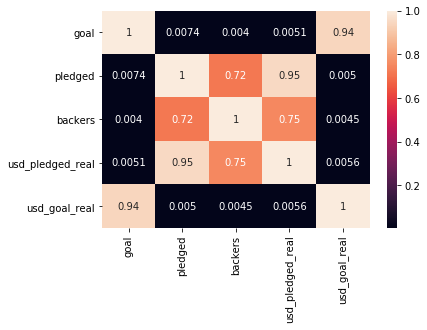

In [16]:
corr = x01_df.corr()

sns.heatmap(corr, annot=True)

`usd_pledged_real`と`pledged`、`usd_goal_real`と`goal`に高い相関性が見られる（データの詳細はよくわからないが、USドルに変換したものっぽい？？）

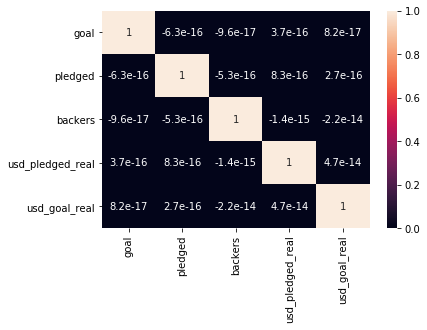

In [20]:
cov = np.cov(X_01, rowvar=0) # 分散・共分散を求める
_, S = np.linalg.eig(cov)           # 分散共分散行列の固有ベクトルを用いて
X01_decorr = np.dot(S.T, X_01.T).T #データを無相関化

X01_decorr_df = pd.DataFrame(X01_decorr, columns=["goal", "pledged", "backers", "usd_pledged_real", "usd_goal_real"])

corr = X01_decorr_df.corr()

sns.heatmap(corr, annot=True)

びっくりするくらい相関関係がなくなっている...！！

### 白色化

In [23]:
stdsc = StandardScaler()
stdsc.fit(X01_decorr)

# 無相関化したデータに対して、さらに標準化
data1_whitening  = stdsc.transform(X01_decorr)

clf = SGDClassifier(
    loss = "log",
    penalty = "elasticnet",
    l1_ratio = 0.5,
    max_iter = 10000,
    fit_intercept=True,
    random_state=1234,
    tol=1e-3
)

clf.fit(data1_whitening, y)
y_pred = clf.predict(data1_whitening)
evaluation(y, y_pred)

正答率（Accuracy） = 70.106%


/Users/kenjoushunsuke/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


適合率（Precision） = 65.192%
再現率（Recall） = 95.519%
F1値（F1-score） = 77.494%


,予測 = canceled,予測 = failed,予測 = live,予測 = successful,予測 = suspended,予測 = undefined
正解 = canceled,37,35918,6,2818,0,0
正解 = failed,63,188860,3,8793,0,0
正解 = live,2,2416,1,380,0,0
正解 = successful,0,57389,0,76567,0,0
正解 = suspended,1,1553,0,292,0,0
正解 = undefined,0,3562,0,0,0,0


汎化誤差も見てみる

In [24]:
from sklearn.model_selection import train_test_split

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(data1_whitening, y, test_size=test_size, random_state=1234) 

clf.fit(X_train, y_train)

# 訓練データで予測
y_pred_train = clf.predict(X_train)

evaluation(y_train, y_pred_train)

正答率（Accuracy） = 70.128%


/Users/kenjoushunsuke/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


適合率（Precision） = 65.186%
再現率（Recall） = 95.496%
F1値（F1-score） = 77.482%


,予測 = canceled,予測 = failed,予測 = live,予測 = successful,予測 = suspended,予測 = undefined
正解 = canceled,30,28759,0,2252,6,0
正解 = failed,54,150894,0,7062,0,0
正解 = live,1,1956,0,294,1,0
正解 = successful,0,45794,0,61512,0,0
正解 = suspended,0,1227,0,233,0,0
正解 = undefined,0,2853,0,0,0,0


In [25]:
y_pred_test = clf.predict(X_test)

evaluation(y_test, y_pred_test)

正答率（Accuracy） = 70.092%
適合率（Precision） = 65.306%
再現率（Recall） = 95.522%
F1値（F1-score） = 77.576%


/Users/kenjoushunsuke/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,予測 = canceled,予測 = failed,予測 = live,予測 = successful,予測 = suspended,予測 = undefined
正解 = canceled,7,7151,0,574,0,0
正解 = failed,13,37931,0,1763,2,0
正解 = live,1,459,0,87,0,0
正解 = successful,0,11505,0,15145,0,0
正解 = suspended,0,327,0,59,0,0
正解 = undefined,0,709,0,0,0,0


前処理を行っていない場合に比べて、汎化誤差がかなり向上している!!

## DAY3

DAY2同様、DAY1と結果を比較

### 特徴選択（フィルタ法）

無相関化で似た処理を行ったのでここではskip

### 特徴選択（ラッパー法）

In [28]:
from sklearn.feature_selection import RFECV

estimator = SGDClassifier(
    loss = "log",
    penalty = "elasticnet",
    l1_ratio = 0.5,
    max_iter = 10000,
    fit_intercept=True,
    random_state=1234,
    tol=1e-3
)

# 分類なのでaccuracyを採用
rfecv = RFECV(estimator, cv=10, scoring='accuracy')

rfecv.fit(X_01, y)

RFECV(cv=10,
      estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                              early_stopping=False, epsilon=0.1, eta0=0.0,
                              fit_intercept=True, l1_ratio=0.5,
                              learning_rate='optimal', loss='log',
                              max_iter=10000, n_iter_no_change=5, n_jobs=None,
                              penalty='elasticnet', power_t=0.5,
                              random_state=1234, shuffle=True, tol=0.001,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

- 計算負荷がかなり高い...!!

In [29]:
# 特徴のランキングを表示（1が最も重要な特徴）
print('Feature ranking: \n{}'.format(rfecv.ranking_))

Feature ranking: 
[1 1 2 1 1]


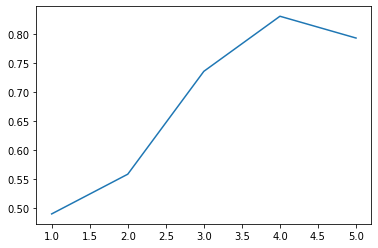

In [30]:
# 特徴数とスコアの変化をプロット
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [31]:
# rfecv.support_でランキング1位以外はFalseとするindexを取得できる
# Trueになっている特徴を使用すれば汎化誤差は最小となる
rfecv.support_

# 上の図で4付近で最大になっているのと一致することを確認

array([ True,  True, False,  True,  True])

In [32]:
# bool型の配列に ~ をつけるとTrueとFalseを反転させることができる
# ここでTrueになっている特徴が削除してもよい特徴
remove_idx = ~rfecv.support_
remove_idx

array([False, False,  True, False, False])

In [36]:
# 削除してもよい特徴の名前を取得する
remove_feature = pd.DataFrame (X_01, columns=["goal", "pledged", "backers", "usd_pledged_real", "usd_goal_real"]).columns[remove_idx]
remove_feature

Index(['backers'], dtype='object')

In [39]:
# drop関数で特徴を削除
selected_train_data = pd.DataFrame (X_01, columns=["goal", "pledged", "backers", "usd_pledged_real", "usd_goal_real"]).drop(remove_feature, axis=1)
selected_train_data

,goal,pledged,usd_pledged_real,usd_goal_real
0,1000.0,0.0,0.0,1533.95
1,30000.0,2421.0,2421.0,30000.00
2,45000.0,220.0,220.0,45000.00
3,5000.0,1.0,1.0,5000.00
4,19500.0,1283.0,1283.0,19500.00
...,...,...,...,...
378656,50000.0,25.0,25.0,50000.00
378657,1500.0,155.0,155.0,1500.00
378658,15000.0,20.0,20.0,15000.00
378659,15000.0,200.0,200.0,15000.00


In [40]:
from sklearn.model_selection import train_test_split

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(selected_train_data, y, test_size=test_size, random_state=1234) 

clf.fit(X_train, y_train)

# 訓練データで予測
y_pred_train = clf.predict(X_train)

evaluation(y_train, y_pred_train)

正答率（Accuracy） = 84.104%


/Users/kenjoushunsuke/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


適合率（Precision） = 81.686%
再現率（Recall） = 92.030%
F1値（F1-score） = 86.550%


,予測 = canceled,予測 = failed,予測 = live,予測 = successful,予測 = suspended,予測 = undefined
正解 = canceled,2053,28380,0,614,0,0
正解 = failed,12505,145416,0,89,0,0
正解 = live,278,1619,0,355,0,0
正解 = successful,1,0,0,107305,0,0
正解 = suspended,117,1106,0,237,0,0
正解 = undefined,24,1497,0,1332,0,0


In [41]:
y_pred_test = clf.predict(X_test)

evaluation(y_test, y_pred_test)

正答率（Accuracy） = 84.176%
適合率（Precision） = 81.862%
再現率（Recall） = 92.130%
F1値（F1-score） = 86.693%


/Users/kenjoushunsuke/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,予測 = canceled,予測 = failed,予測 = live,予測 = successful,予測 = suspended,予測 = undefined
正解 = canceled,515,7066,0,151,0,0
正解 = failed,3096,36584,0,29,0,0
正解 = live,62,381,0,104,0,0
正解 = successful,0,0,0,26650,0,0
正解 = suspended,37,278,0,71,0,0
正解 = undefined,6,381,0,322,0,0


想像以上によくなっている

### 特徴選択（埋め込み法）

In [44]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(estimator, threshold=1e-3)

sfm.fit(X_01, y)

SelectFromModel(estimator=SGDClassifier(alpha=0.0001, average=False,
                                        class_weight=None, early_stopping=False,
                                        epsilon=0.1, eta0=0.0,
                                        fit_intercept=True, l1_ratio=0.5,
                                        learning_rate='optimal', loss='log',
                                        max_iter=10000, n_iter_no_change=5,
                                        n_jobs=None, penalty='elasticnet',
                                        power_t=0.5, random_state=1234,
                                        shuffle=True, tol=0.001,
                                        validation_fraction=0.1, verbose=0,
                                        warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=0.001)

In [43]:
# get_support関数で使用する特徴のインデックスを使用
# Trueになっている特徴が使用する特徴
sfm.get_support()

array([ True,  True,  True,  True,  True])